In [1]:
import numpy as np
import pandas as pd

#Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
%matplotlib inline
sns.set(style='darkgrid', context='talk', palette='rainbow')

#EDA

In [3]:
train = pd.read_csv('train.csv', index_col=0)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
#Number of missing data

mis_val_tot = train.isnull().sum().sort_values(ascending=False)
mis_val_per = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
mis_data = pd.concat([mis_val_tot, mis_val_per], axis=1, keys=['Total', 'Percent'])

mis_data

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


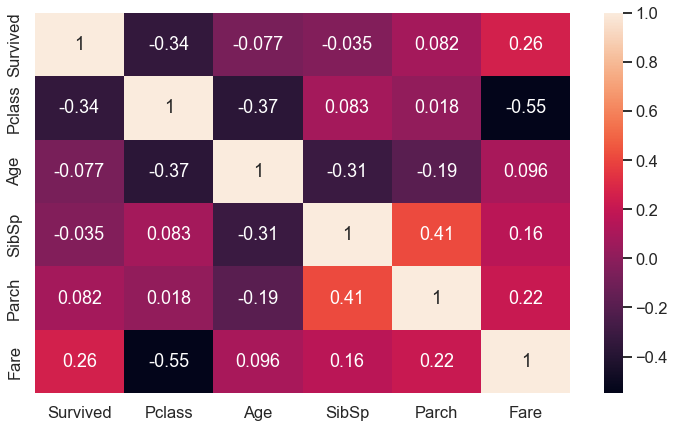

In [7]:
#Correlation among features

plt.figure(figsize=(12,7))

corr = train.corr()

sns.heatmap(corr, annot=True);

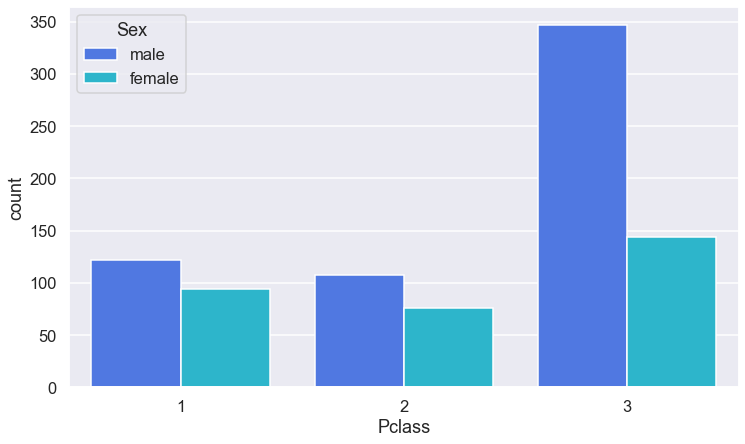

In [8]:

plt.figure(figsize=(12,7))

sns.countplot(x='Pclass', data=train, hue='Sex');

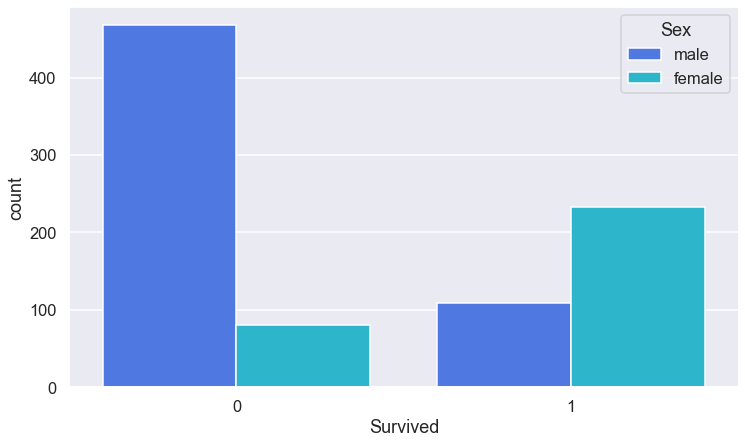

In [9]:
plt.figure(figsize=(12,7))

sns.countplot(x='Survived', data=train, hue='Sex');

<Figure size 864x504 with 0 Axes>

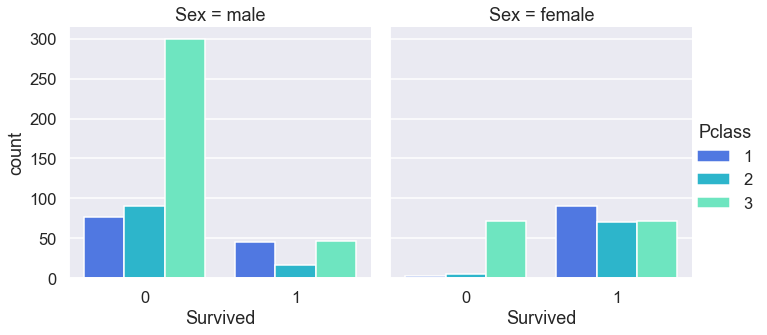

In [10]:
plt.figure(figsize=(12,7))

sns.catplot(x='Survived', data=train, hue='Pclass', col='Sex', kind='count');

C:\Users\matth\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


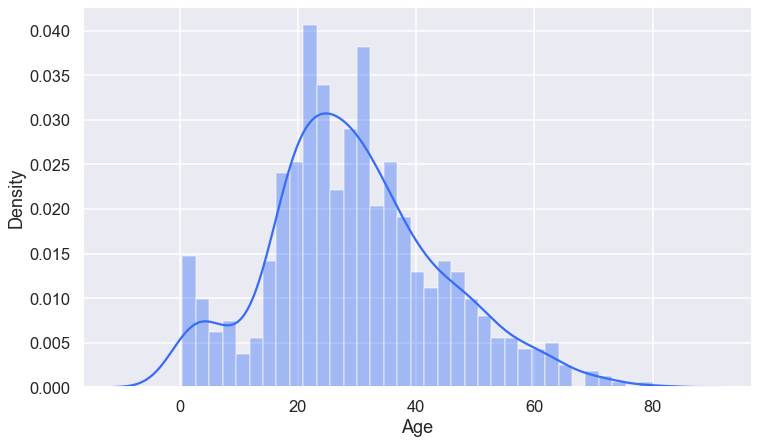

In [11]:
plt.figure(figsize=(12,7))

sns.distplot(train['Age'], bins=35);

C:\Users\matth\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


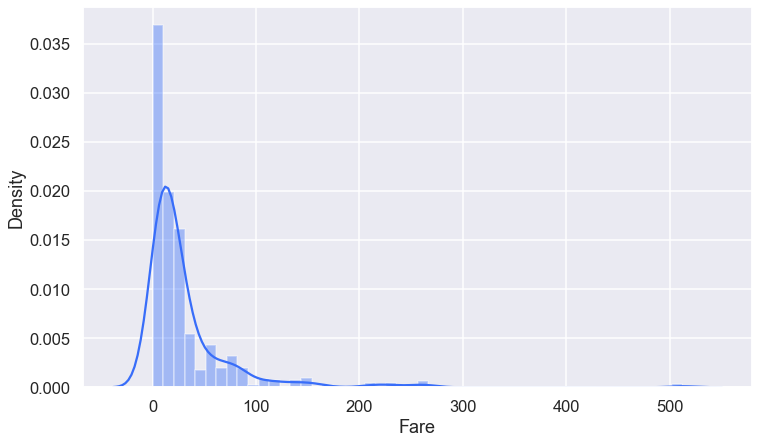

In [12]:
plt.figure(figsize=(12,7))

sns.distplot(train['Fare'], bins=50);

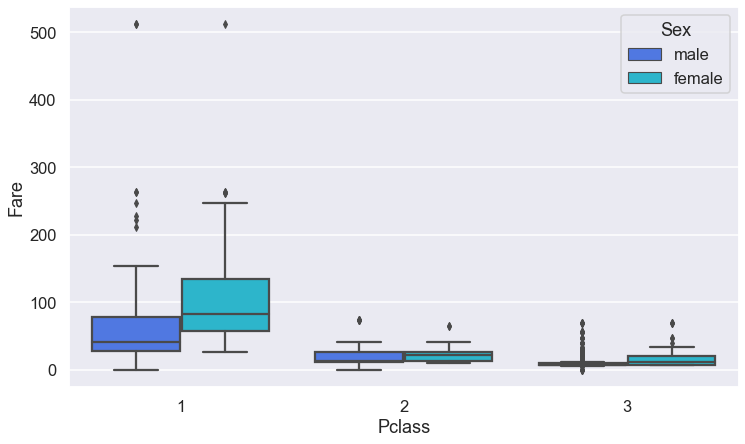

In [13]:
plt.figure(figsize=(12,7))

sns.boxplot(x='Pclass', y='Fare', data=train, hue='Sex');

In [14]:
#Fill in data for Age using the mean age for each Pclass

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            
            return 37
        
        elif Pclass == 2:
            
            return 29
        
        else: 
            
            return 24
    else:
        
        return Age

In [15]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [16]:
# We must also remove the Cabin column

train.drop('Cabin', axis=1, inplace=True)
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
train.isnull().sum().max()

2

In [18]:
train.dropna(inplace=True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [20]:
train.drop(['Name','Ticket'], axis=1, inplace=True)

In [21]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [22]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
print(train[train['Pclass'] == 1]['Fare'].mean())
print('\n')
print(train[train['Pclass'] == 2]['Fare'].mean())
print('\n')
print(train[train['Pclass'] == 3]['Fare'].mean())


84.19351635514012


20.66218315217391


13.675550101832997


In [24]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        
        if Pclass == 1:
            
            return 84.155
        
        elif Pclass == 2:
            
            return 20.662
        
        else: 
            
            return 13.676
    else:
        
        return Fare

In [25]:
train['Fare']= train['Fare'].replace(0.0, np.nan)
train.dropna(axis=0,inplace=True)

In [26]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.387872,2.318078,28.952140,0.533181,0.389016,32.647539
std,0.487544,0.834243,13.279902,1.110987,0.812090,49.942710
min,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
#Modifying categorical data

cat_feats = ['Sex','Embarked']

final_train = pd.get_dummies(train, columns=cat_feats, drop_first=True)

final_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,1,0,1
888,1,1,19.0,0,0,30.0000,0,0,1
889,0,3,24.0,1,2,23.4500,0,0,1


In [28]:
log = LogisticRegression(max_iter=200)

In [29]:
x_train = final_train.drop('Survived', axis=1)
y_train = final_train['Survived']


In [30]:
log.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [31]:
#Import test data
test = pd.read_csv('train.csv')
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
test.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)

In [35]:
test.set_index('PassengerId', drop=True, inplace=True)


In [36]:
test_feats = ['Sex', 'Embarked']

final_test = pd.get_dummies(test, columns=test_feats, drop_first=True)

final_test

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,1,0,1
888,1,1,19.0,0,0,30.0000,0,0,1
889,0,3,NaN,1,2,23.4500,0,0,1


In [37]:
final_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
final_test.dropna(inplace=True)

In [39]:
final_test.isnull().sum().max()

0

In [40]:
x_test = final_test.drop('Survived', axis=1)
y_test = final_test['Survived']

In [41]:
pred = log.predict(x_test)

In [42]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[366  58]
 [ 84 206]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       424
           1       0.78      0.71      0.74       290

    accuracy                           0.80       714
   macro avg       0.80      0.79      0.79       714
weighted avg       0.80      0.80      0.80       714



In [43]:
from sklearn.svm import SVC

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [46]:
grid = GridSearchCV(SVC(), param_grid=params, verbose=3)

In [47]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.611 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.611 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.611 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.611 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.615 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.611 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.611 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.611 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.611 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.615 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.589 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.611 total time=   0.0s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.697 total time=   0.0s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.646 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.638 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.646 total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.657 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.737 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.714 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.684 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.714 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.749 total time=   0.1s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.766 total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [48]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [49]:
grid_preds = grid.predict(x_test)

In [50]:
print(confusion_matrix(y_test,grid_preds))
print('\n')
print(classification_report(y_test,grid_preds))

[[381  43]
 [ 53 237]]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89       424
           1       0.85      0.82      0.83       290

    accuracy                           0.87       714
   macro avg       0.86      0.86      0.86       714
weighted avg       0.87      0.87      0.87       714



In [51]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(x_train,y_train)

log_pred = log.predict(x_test)

In [52]:
print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred))

[[366  58]
 [ 84 206]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       424
           1       0.78      0.71      0.74       290

    accuracy                           0.80       714
   macro avg       0.80      0.79      0.79       714
weighted avg       0.80      0.80      0.80       714

